In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading our MPG3 dataset

In [2]:
mpg = pd.read_csv("mpg3.csv")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


In [3]:
mpg.shape

(405, 9)

# Question 1: Check to see if there are any missing values. Fix the missing values by imputing value from the mean. After fixing missing values, you should still have 405 rows

In [4]:
mpg.isnull().any()

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [5]:
mpg['mpg'] = mpg['mpg'].fillna(mpg['mpg'].mean())

In [6]:
mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].mean())

In [7]:
mpg['weight'] = mpg['weight'].fillna(mpg['weight'].mean())

In [8]:
mpg.shape

(405, 9)

# Question 2 : Use Boxplot to see if there are any outliers on ALL of the numerical fields (Hint you should have 402 rows now after outliers removal)

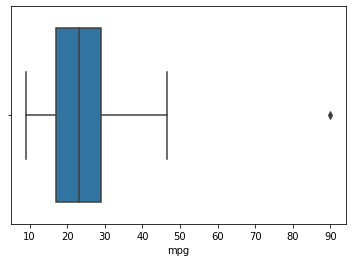

In [9]:
sns.boxplot(x=mpg['mpg'])

In [10]:
mpg = mpg[ mpg.mpg < 90]

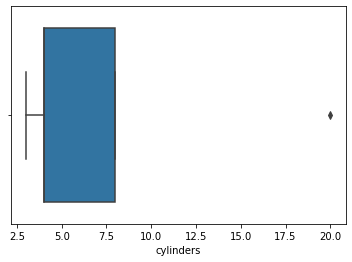

In [11]:
sns.boxplot(x=mpg['cylinders'])

In [12]:
mpg = mpg[ mpg.cylinders < 20]

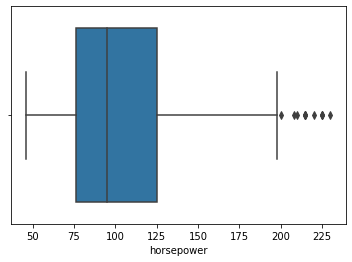

In [13]:
sns.boxplot(x=mpg['horsepower'])

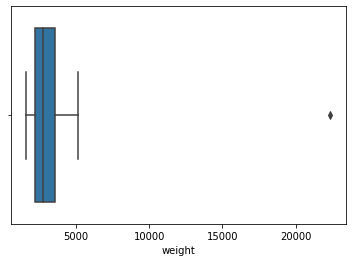

In [14]:
sns.boxplot(x=mpg['weight'])

In [15]:
mpg = mpg[ mpg.weight < 20000]

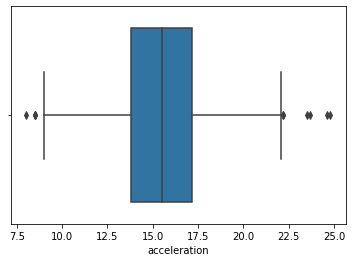

In [16]:
sns.boxplot(x=mpg['acceleration'])

In [17]:
mpg.shape

(402, 9)

# Question 3 : Remove any duplicates rows. Hint after removal, you should have 400 rows now

In [18]:
print("Before duplicates removal: ", mpg.shape)

Before duplicates removal:  (402, 9)


In [19]:
mpg.duplicated().sum()

2

In [20]:
mpg = mpg.drop_duplicates()

In [21]:
print("After duplicates removal: ", mpg.shape)

After duplicates removal:  (400, 9)


# Question 4: Create a pair plot

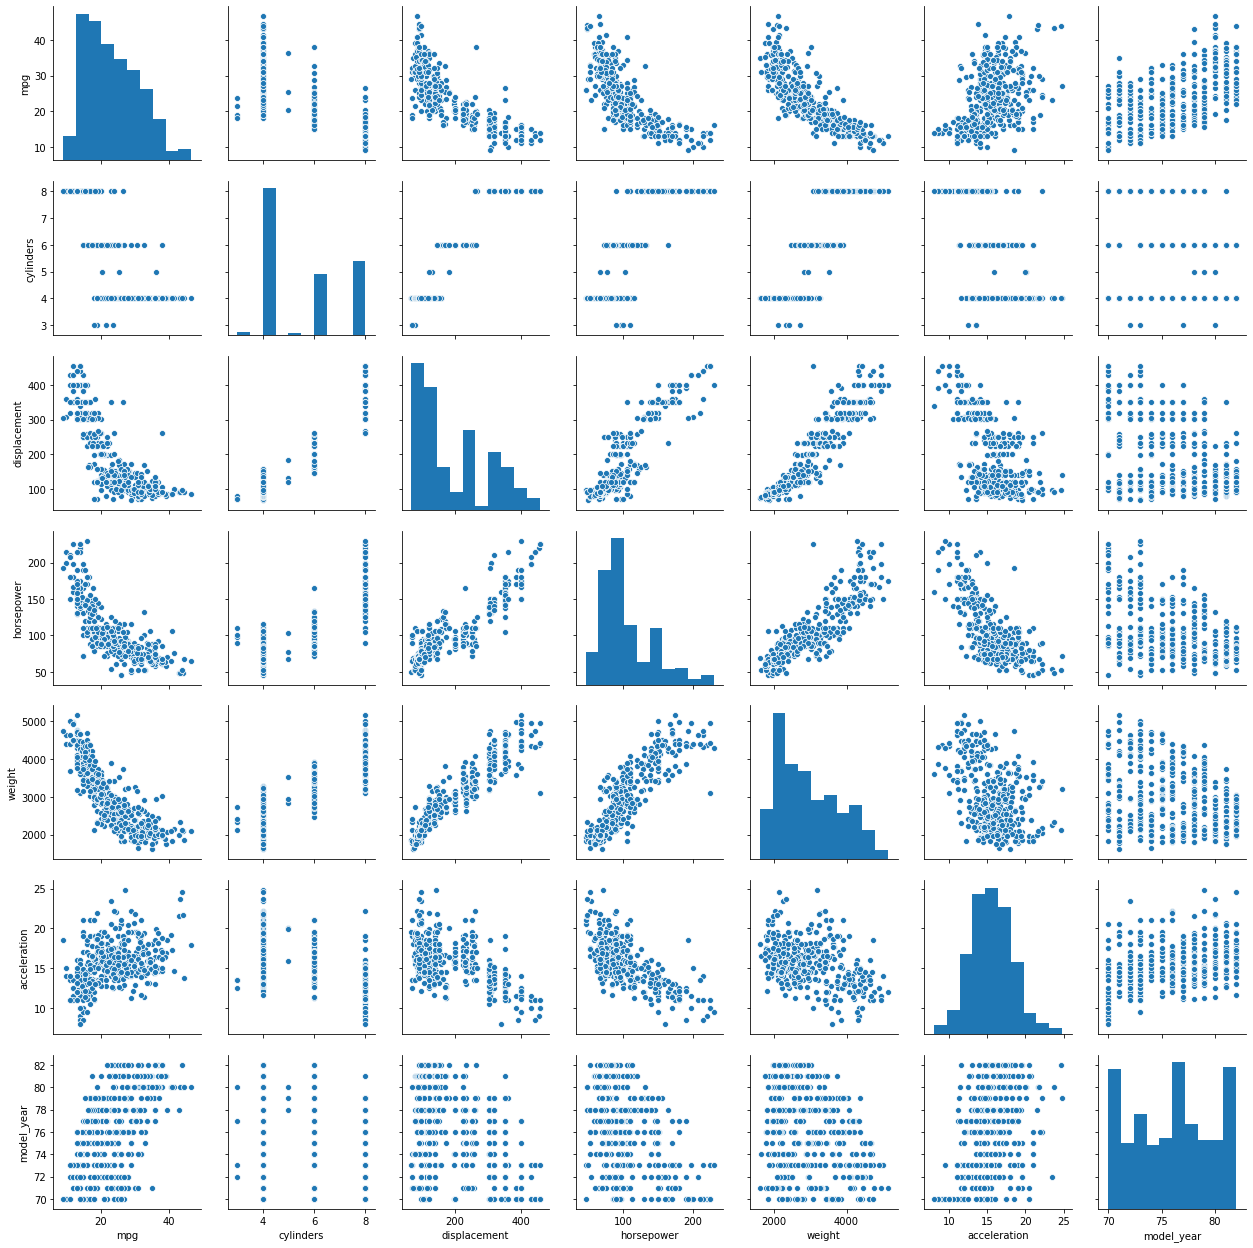

In [22]:
sns.pairplot(data=mpg)

# Question 5: Create a FacetGrid of a scatter plot of mpg vs weight for different country

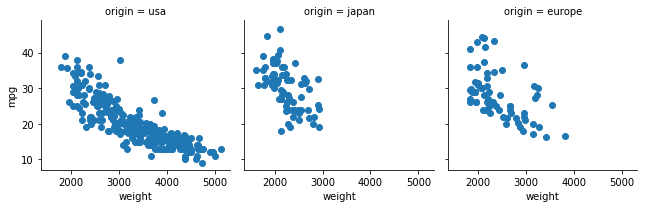

In [23]:
g = sns.FacetGrid(mpg, col = 'origin')
g = (g.map(plt.scatter, "weight", "mpg").add_legend())

# Now Load the adult income dataset and do some EDA and answer the following questions based on the Adult income dataset

In [24]:
adult = pd.read_csv("adult.data.csv")
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
adult.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

In [26]:
print(adult.shape)
adult.describe()

(32561, 15)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Question 6 : Which two martial-status is most common

In [27]:
from collections import Counter

In [28]:
Counter = Counter(adult['marital-status']) 

In [29]:
most_occur = Counter.most_common(2) 

In [30]:
print(most_occur) 

[('Married-civ-spouse', 14976), ('Never-married', 10683)]


# Question 7: Plot the age distribution broken down by different martial-status using a FacetGrid

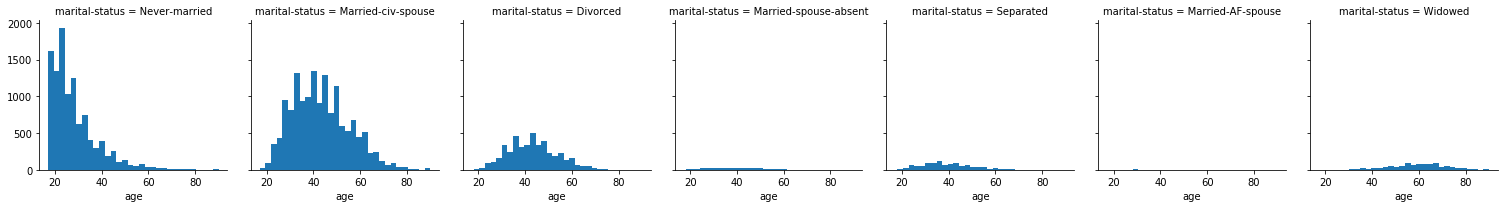

In [31]:
g = sns.FacetGrid(adult, col = 'marital-status')
g = g.map(plt.hist, 'age', bins=30)

# Question 8: Create a Facet Grid for fnlwgt against age broken down by race and sex. You should have 10 sub-plots

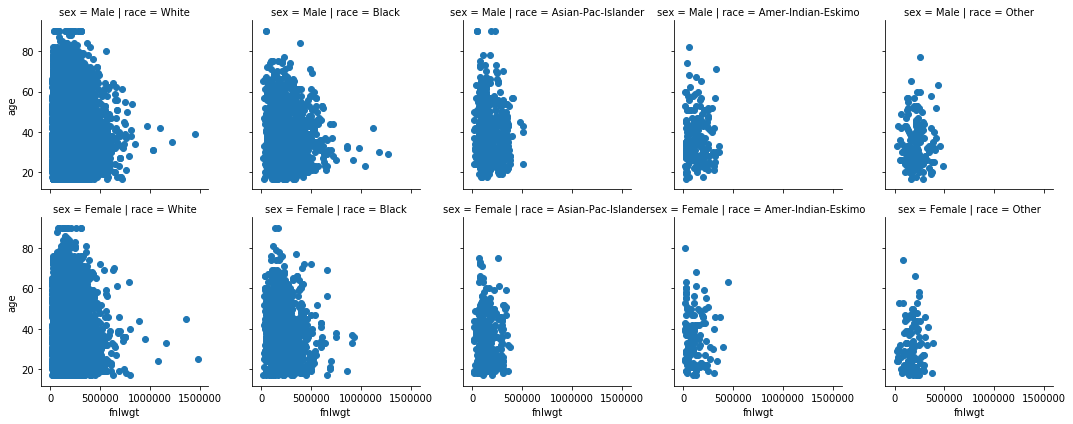

In [32]:
g = sns.FacetGrid(adult, col= 'race',  row="sex")
g = g.map(plt.scatter, 'fnlwgt', 'age')

# Now Load the housing data and answer all the remaining questions based on the housing dataset

In [33]:
housing = pd.read_csv("USA_housing.csv")
housing.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


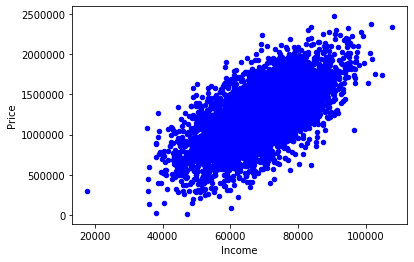

In [34]:
# a scatter plot comparing num_children and num_pets
housing.plot(kind='scatter',x='Income',y='Price',color='blue')
plt.show()

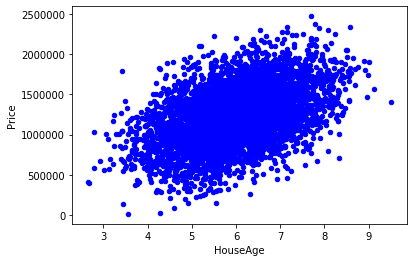

In [35]:
housing.plot(kind='scatter', x = "HouseAge", y = "Price", color = "blue")

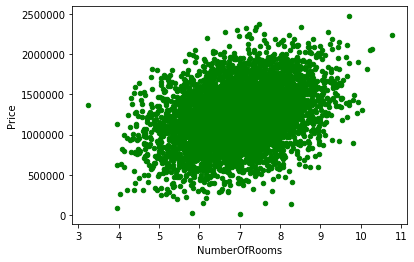

In [36]:
housing.plot(kind='scatter', x = "NumberOfRooms", y = "Price", color = "green")

# Question 9: Use a pair plot or individual scatter plots, pick ONE variable that best explains house price

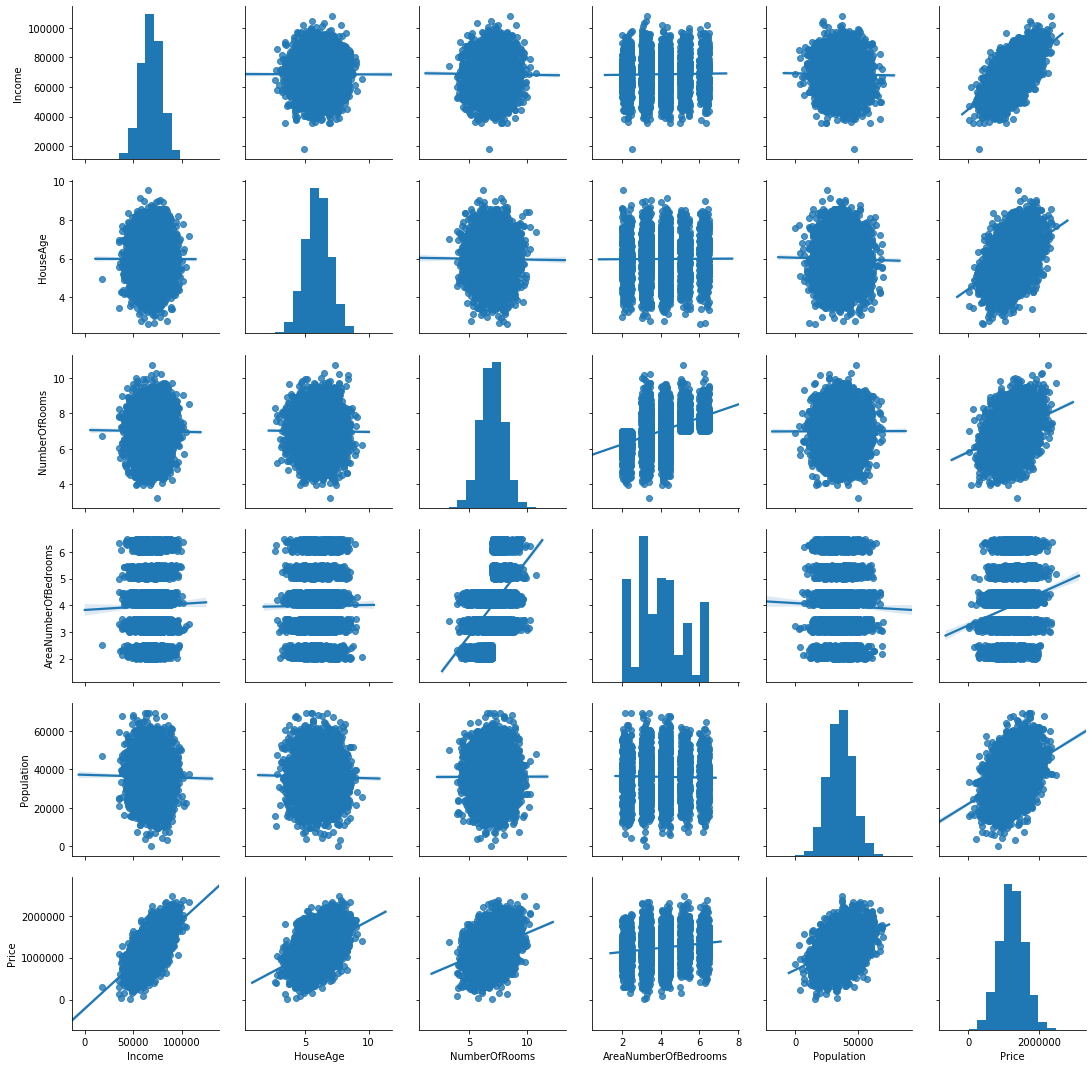

In [37]:
sns.pairplot(housing, kind='reg')

Income affects house price at the most

# Question 10:  Use that variable to build a one-variable Linear Regression model of the house price. Make sure you split the data between Training and Testing set first, Save 20% as your testing data

In [38]:
X = housing['Price'].values.reshape(-1, 1)
Y = housing['Income'].values.reshape(-1, 1)

In [39]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X, Y)
print(model1.intercept_)
print(model1.coef_)
Y_pred = model1.predict(X)

[44793.26675365]
[[0.0193088]]


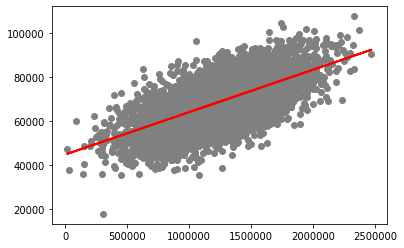

In [40]:
plt.scatter(X, Y,  color='gray')
plt.plot(X, Y_pred, color='red', linewidth=2)
plt.show()

In [41]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [42]:
print(X_train.shape, X_train.shape)
print(Y_train.shape, Y_test.shape)

(4000, 1) (4000, 1)
(4000, 1) (1000, 1)


In [43]:
model2 = LinearRegression()
model2.fit(X_train, Y_train)
print(model2.intercept_)
print(model2.coef_)

[44706.29640028]
[[0.01936555]]


In [44]:
Y_pred = model2.predict(X_test)

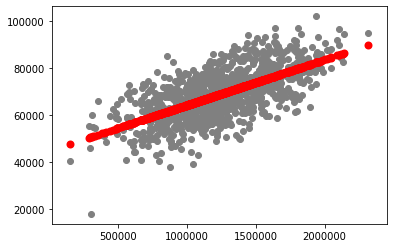

In [45]:
plt.scatter(X_test, Y_test,  color='gray')
plt.scatter(X_test, Y_pred, color='red', linewidth=2)
plt.show()

In [46]:
from sklearn import metrics

In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 6608.187035029035
Mean Squared Error: 67314017.38154756
Root Mean Squared Error: 8204.512013614676
R-squared: 0.4005188171698284


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(3000, 1) (2000, 1)
(3000, 1) (2000, 1)


In [49]:
model3 = LinearRegression()
model3.fit(X_train, Y_train)
print(model3.intercept_)
print(model3.coef_)

[44829.41300522]
[[0.01934156]]


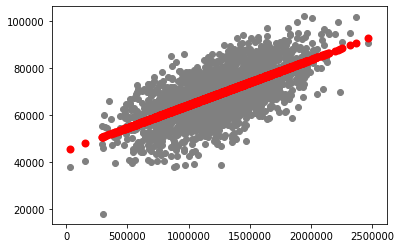

In [50]:
Y_pred = model3.predict(X_test)
plt.scatter(X_test, Y_test,  color='gray')
plt.scatter(X_test, Y_pred, color='red', linewidth=2)
plt.show()

In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 6459.307783243701
Mean Squared Error: 65604783.531083405
Root Mean Squared Error: 8099.6779893452185
R-squared: 0.41801635361114053


# Question 11: Now do a 10-fold Cross Validation of your model. Does your model pass cross validation?

In [52]:
import random
for i in range(10):
    print(random.randint(1, 1000))

193
17
714
981
984
384
540
652
17
514


In [53]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))

Trial 0, R-squared: 0.41588652807957793,  Slope: [[0.01937628]], Intercept: [44647.90964334],  
Trial 1, R-squared: 0.4107421109229643,  Slope: [[0.01930419]], Intercept: [44786.73299388],  
Trial 2, R-squared: 0.4057474555858912,  Slope: [[0.01941503]], Intercept: [44681.01392414],  
Trial 3, R-squared: 0.3721814567799714,  Slope: [[0.0195783]], Intercept: [44508.66272481],  
Trial 4, R-squared: 0.420307971504552,  Slope: [[0.01913821]], Intercept: [45041.45829211],  
Trial 5, R-squared: 0.42007280856649565,  Slope: [[0.01923935]], Intercept: [44874.01544226],  
Trial 6, R-squared: 0.3876522456455288,  Slope: [[0.01948968]], Intercept: [44613.04131893],  
Trial 7, R-squared: 0.3856861879700968,  Slope: [[0.01914118]], Intercept: [44888.65903017],  
Trial 8, R-squared: 0.39194456775456166,  Slope: [[0.01937233]], Intercept: [44722.46370615],  
Trial 9, R-squared: 0.40292040279448116,  Slope: [[0.01923339]], Intercept: [44849.12622703],  


In [54]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf

,trial,Rsquare
0,0,0.406552
1,1,0.380686
2,2,0.413354
3,3,0.404296
4,4,0.409373
5,5,0.431378
6,6,0.435591
7,7,0.374720
8,8,0.420202
9,9,0.407885


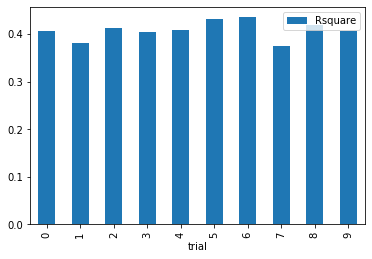

In [55]:
rdf.plot.bar(x='trial', y='Rsquare')

In [56]:
print(rdf['Rsquare'].mean())

0.4084035446688549


# Question 12: Now pick ONE more variable in addition to the variable you choose from Question 9 and build a two-variables Linear Regression model of the house price. Make sure you split the data into training and testing set first

In [57]:
X = housing['Price'].values.reshape(-1, 1)
Y = housing[['Income','HouseAge']].values.reshape(-1, 2)
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)
print(0.8 * housing.shape[0])

(4000, 1) (1000, 1)
(4000, 2) (1000, 2)
4000.0


In [58]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(model.coef_)
print(model.intercept_)

[[1.93655478e-02]
 [1.27943491e-06]]
[4.47062964e+04 4.39658379e+00]


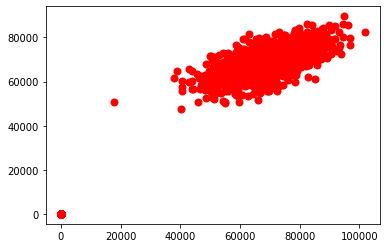

In [59]:
plt.scatter(Y_test, Y_pred, color='red', linewidth=2)
plt.show()

In [60]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 3304.4348243499016
Mean Squared Error: 33657009.06529397
Root Mean Squared Error: 5801.466113431497
R-squared: 0.3004736343838517


In [61]:
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

R-squared: 0.3004736343838517


In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)
print(0.6 * housing.shape[0])

(3000, 1) (2000, 1)
(3000, 2) (2000, 2)
3000.0


In [63]:
model5 = LinearRegression()
model5.fit(X_train, Y_train)
Y_pred = model5.predict(X_test)
print(model5.coef_)
print(model5.intercept_)

[[1.93415558e-02]
 [1.26534957e-06]]
[4.48294130e+04 4.40551753e+00]


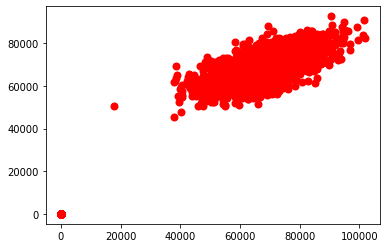

In [64]:
plt.scatter(Y_test, Y_pred, color='red', linewidth=2)
plt.show()

In [65]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 3229.9949434219193
Mean Squared Error: 32802392.140242673
Root Mean Squared Error: 5727.337264405046
R-squared: 0.3167386530308831


In [66]:
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

R-squared: 0.3167386530308831


# Question 13: Do a 10-fold Cross Validation of your two-variable model. Does your model pass cross validation?

Trial 0, R-squared: 0.3076369688029205,  Slope: [[1.94043042e-02]
 [1.24177330e-06]], Intercept: [4.46426589e+04 4.44220812e+00],  
Trial 1, R-squared: 0.31323336265079393,  Slope: [[1.91999635e-02]
 [1.26621869e-06]], Intercept: [4.49258104e+04 4.41081507e+00],  
Trial 2, R-squared: 0.3223438838980265,  Slope: [[1.91107679e-02]
 [1.27166224e-06]], Intercept: [4.50493154e+04 4.41506755e+00],  
Trial 3, R-squared: 0.2999705546854483,  Slope: [[1.94263996e-02]
 [1.25452453e-06]], Intercept: [4.45191803e+04 4.43395400e+00],  
Trial 4, R-squared: 0.3097370958366979,  Slope: [[1.93686394e-02]
 [1.25896719e-06]], Intercept: [4.46716320e+04 4.42224428e+00],  
Trial 5, R-squared: 0.3025568764599633,  Slope: [[1.92446267e-02]
 [1.26334413e-06]], Intercept: [4.48361608e+04 4.42992859e+00],  
Trial 6, R-squared: 0.2863577736799141,  Slope: [[1.91237689e-02]
 [1.30291057e-06]], Intercept: [4.49744496e+04 4.36719548e+00],  
Trial 7, R-squared: 0.31473491518230634,  Slope: [[1.93755985e-02]
 [1.2726

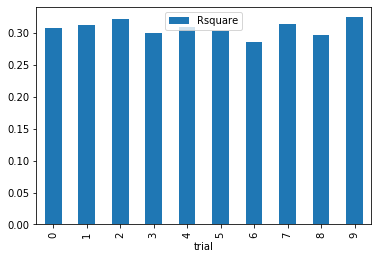

In [67]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))

    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

In [68]:
print(rdf['Rsquare'].mean())

0.3077566448124487
